['id', 'Unnamed: 32']


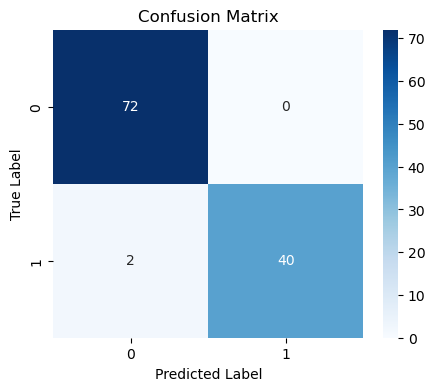

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

{'accuracy': 0.9824561403508771, 'auc': 0.996031746031746, 'precision': 1.0, 'recall': 0.9523809523809523, 'f1': 0.975609756097561, 'mcc': 0.962621902223779}


In [24]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef
)
import matplotlib.pyplot as plt
import seaborn as sns
from model_python.classification import preprocess_data

#This is a static way for feature engineering
## Step 2: Load dataset
df = pd.read_csv("data/data.csv")
## Step 3: Drop unnecessary columns
#df.drop(columns=["id", "Unnamed: 32"], inplace=True)
#
## Step 4: Encode target variable
## M = 1 (Malignant), B = 0 (Benign)
#df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0}) #we are changing M and B to o,1 as in ML world string won't help.
#
## Step 5: Separate features and target
#X = df.drop("diagnosis", axis=1) #we don't want this as an input as we have to predict this.
#y = df["diagnosis"]
#print(y)

#Making it dynamic, the dynamic feature engineering which can support many cases/data.

X, y, target_column = preprocess_data(df, target_column=None)

def logistic_model(X,y):
    # Train-test split 20% test 80% training and random sample is 50
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y
    )
    # Step 7: Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) #fit and transform --> Fit -> Mean & std Tansform --> feature scaling training data.
    X_test = scaler.transform(X_test) #Apply the same feature scaling on test data.
    # Step 8: Train Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Step 9: Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Step 10: Evaluation Metrics
    baseline_metrics ={
    "accuracy": accuracy_score(y_test, y_pred),
    "auc": float(roc_auc_score(y_test, y_prob)),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "mcc": float(matthews_corrcoef(y_test, y_pred))
    }
   # st.subheader("📊 Confusion Matrix")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    return baseline_metrics, y_test, y_pred 

result, xab, yab = logistic_model(X,y)

print(result)    
    
# Step 11: Print results
#print(f"Accuracy  : {accuracy:.4f}")
#print(f"AUC Score : {auc:.4f}")
#print(f"Precision : {precision:.4f}")
#print(f"Recall    : {recall:.4f}")
#print(f"F1 Score  : {f1:.4f}")
#print(f"MCC Score : {mcc:.4f}")